In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [26]:
df.shape

(418, 10)

Variable description:


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
l=[]
for i in  df.columns:
    if df[i].dtype=="object":
        l.append(i)    

In [12]:
l

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [13]:
df[l].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [15]:
df["Ticket"].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [16]:
df["Ticket"][0:15]

0          330911
1          363272
2          240276
3          315154
4         3101298
5            7538
6          330972
7          248738
8            2657
9       A/4 48871
10         349220
11            694
12          21228
13          24065
14    W.E.P. 5734
Name: Ticket, dtype: object

In [22]:
# ticket is not going to be particularly useful
del df["Ticket"]

In [17]:
df["PassengerId"][0:8]

0    892
1    893
2    894
3    895
4    896
5    897
6    898
7    899
Name: PassengerId, dtype: int64

In [19]:
# passenger id is not particularly useful
del df["PassengerId"]

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [25]:
df.Cabin.isnull().sum()

327

In [27]:
df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [ ]:
# we can find survival percentage based on cabin category a,b,c,d,e

In [29]:
df1=pd.Categorical(df["Survived"])
df1=df1.rename_categories(["Not Survived","Survived"])

In [30]:
df1

['Not Survived', 'Survived', 'Not Survived', 'Not Survived', 'Survived', ..., 'Not Survived', 'Survived', 'Not Survived', 'Not Survived', 'Not Survived']
Length: 418
Categories (2, object): ['Not Survived', 'Survived']

In [31]:
df1.describe()

,counts,freqs
categories,,
Not Survived,266,0.636364
Survived,152,0.363636


In [32]:
df["survived_modified_column"]=df1

In [33]:
df["survived_modified_column"]

0      Not Survived
1          Survived
2      Not Survived
3      Not Survived
4          Survived
           ...     
413    Not Survived
414        Survived
415    Not Survived
416    Not Survived
417    Not Survived
Name: survived_modified_column, Length: 418, dtype: category
Categories (2, object): ['Not Survived', 'Survived']

In [35]:
df["survived_modified_column"].value_counts()

Not Survived    266
Survived        152
Name: survived_modified_column, dtype: int64

In [36]:
df2=pd.Categorical(df["Pclass"],ordered=True)

In [37]:
df2=df2.rename_categories(["class1","class2","class3"])

In [38]:
df2

['class3', 'class3', 'class2', 'class3', 'class3', ..., 'class3', 'class1', 'class3', 'class3', 'class3']
Length: 418
Categories (3, object): ['class1' < 'class2' < 'class3']

In [39]:
df["pclass_modified"]=df2

In [47]:
cross_tabulation = pd.crosstab(df["pclass_modified"], df["survived_modified_column"],margins=True,margins_name="Total",normalize=True)

print(cross_tabulation)

survived_modified_column  Not Survived  Survived     Total
pclass_modified                                           
class1                        0.136364  0.119617  0.255981
class2                        0.150718  0.071770  0.222488
class3                        0.349282  0.172249  0.521531
Total                         0.636364  0.363636  1.000000


In [48]:
import numpy as np

In [49]:
df["Cabin"]=df["Cabin"].apply(lambda x:str(x))

In [50]:
cabin_modified=[cabin[0] for cabin in df.Cabin]

In [52]:
df["cabin_modified"]=cabin_modified

In [54]:
cross_tabulation = pd.crosstab(df["cabin_modified"], df["survived_modified_column"],margins=True,margins_name="Total")

print(cross_tabulation)

survived_modified_column  Not Survived  Survived  Total
cabin_modified                                         
A                                    4         3      7
B                                    9         9     18
C                                   16        19     35
D                                    8         5     13
E                                    5         4      9
F                                    5         3      8
G                                    0         1      1
n                                  219       108    327
Total                              266       152    418


In [56]:
df["Age"].isnull().sum()

86

In [57]:
df["Age"]=df["Age"].fillna(0)

In [58]:
import seaborn as sns

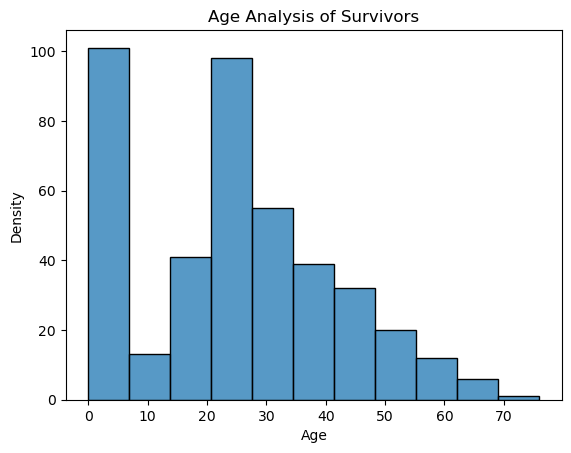

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming "df" is your DataFrame containing the "Age" column
sns.histplot(df["Age"])
plt.title("Age Analysis of Survivors")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()
